In [6]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

1. Алгоритм SVM и рассчет метрик precision и recall, F-мера и F$\beta$-мера.

In [17]:
np.random.seed(0)

# исходные параметры распределений классов
r1 = 0.2
D1 = 3.0
mean1 = [2, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [-1, -1]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N1 = 2500
N2 = 1500
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N1) * -1, np.ones(N2)])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.4, shuffle=True)


clf = svm.SVC(kernel='linear') # классификатор с линейным ядром
clf.fit(x_train, y_train)

w12 = clf.coef_[0]
w0 = clf.intercept_[0]
w = np.array([w0, w12[0], w12[1]])

predict = clf.predict(x_test)

TP = ((predict == 1) & (y_test == 1)).sum()
TN = ((predict == -1) & (y_test == -1)).sum()
FP = ((predict == 1) & (y_test == -1)).sum()
FN = ((predict == -1) & (y_test == 1)).sum()

precision = TP/(TP+FP)
recall = TP/(TP+FN)
b = 0.5

F = (2 * precision * recall) / (precision + recall)
Fb = ((1+b**2)*precision*recall) / (b**2 * precision + recall)

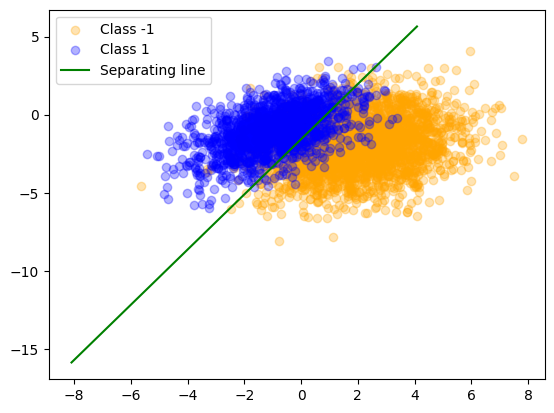

In [18]:
plt.scatter(data_x[data_y==-1][:,0], data_x[data_y==-1][:,1], color='orange', alpha=0.3, label='Class -1')
plt.scatter(data_x[data_y==1][:,0], data_x[data_y==1][:,1], color='blue', alpha=0.3, label='Class 1')

x_min, x_max = np.min(data_x[:, 1]), np.max(data_x[:, 1])
x_range = np.linspace(x_min, x_max, 100)
y_range = -x_range * w[1] / w[2] - w[0] / w[2]

plt.plot(x_range, y_range, color='green', label='Separating line')

plt.legend()

plt.show()

2. Алгоритм SVM и ROC-AUC.

In [19]:
np.random.seed(0)

# исходные параметры распределений классов
r1 = -0.2
D1 = 3.0
mean1 = [1, -5]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [-1, -2]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N1 = 1000
N2 = 1000
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N1) * -1, np.ones(N2)])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.5, shuffle=True)
x_test = np.array([[1, x[0], x[1]] for x in x_test])


clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

w12 = clf.coef_[0]
w0 = clf.intercept_[0]
w = np.array([w0, w12[0], w12[1]])

range_t = np.arange(5.7, -7.8, -0.1)
FPR = []
TPR = []
for t in range_t:
    predict = np.array([np.sign(x_test @ w - t)])
    
    TP = ((predict == 1) & (y_test == 1)).sum()
    TN = ((predict == -1) & (y_test == -1)).sum()
    FP = ((predict == 1) & (y_test == -1)).sum()
    FN = ((predict == -1) & (y_test == 1)).sum()

    FPR.append(FP / (FP + TN))
    TPR.append(TP / (TP + FN))

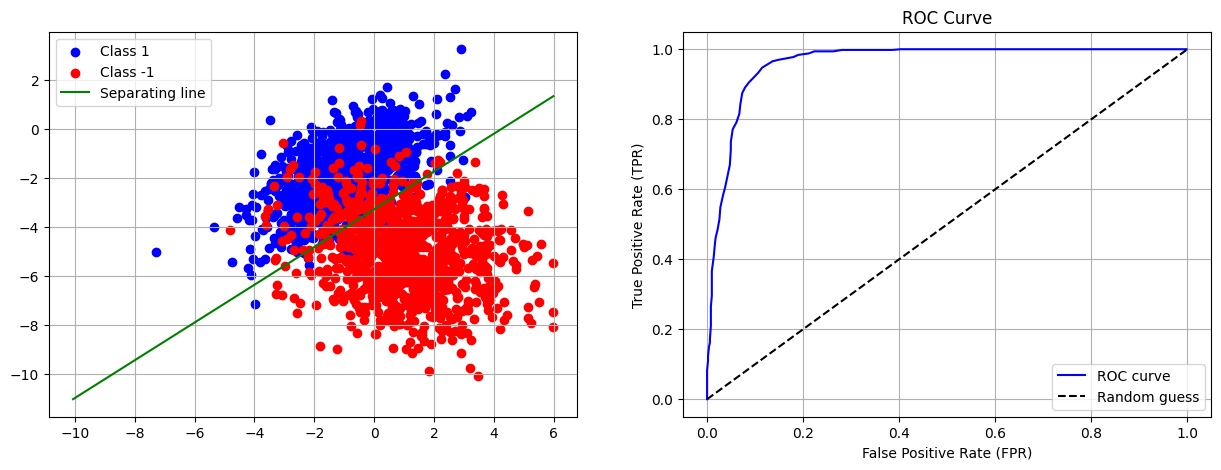

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].grid()
ax[1].grid()

x_0 = data_x[data_y == 1]
x_1 = data_x[data_y == -1]

x_min, x_max = np.min(data_x), np.max(data_x)
x_range = np.linspace(x_min, x_max, 100)
y_range = -x_range * w[1] / w[2] - w[0] / w[2]

ax[0].scatter(x_0[:, 0], x_0[:, 1], color='blue', label='Class 1')
ax[0].scatter(x_1[:, 0], x_1[:, 1], color='red', label='Class -1')
ax[0].plot(x_range, y_range, color='green', label='Separating line')

ax[1].plot(FPR, TPR, label='ROC curve', color='blue')
ax[1].plot([0, 1], [0, 1], 'k--', label='Random guess')
ax[1].set_xlabel('False Positive Rate (FPR)')
ax[1].set_ylabel('True Positive Rate (TPR)')
ax[1].set_title('ROC Curve')

ax[0].legend()
ax[1].legend()
plt.show()